In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Exporting cvs file for the IPEA Atlas da Violência dataset
# This is the dataset for homicides by city only 
df = pd.read_csv('./Datasets/homicidios.csv', sep=';')
df.head(10)

,cod,nome,período,valor
0,4104808,Cascavel,2000,79
1,4104709,Carlópolis,2000,3
2,4104659,Carambeí,2000,1
3,4104600,Capitão Leônidas Marques,2000,0
4,4104501,Capanema,2000,0
5,4104451,Cantagalo,2000,5
6,4104428,Candói,2000,2
7,4104402,Cândido de Abreu,2000,0
8,4104303,Campo Mourão,2000,11
9,4104253,Campo Magro,2000,5


In [73]:
# Filters the dataframe by only the ones from Curitiba
df_cwb = df.query('nome == "Curitiba"')
df_cwb.head(10)

,cod,nome,período,valor
5126,4106902,Curitiba,2000,336
9457,4106902,Curitiba,2001,384
17661,4106902,Curitiba,2002,437
17662,4106902,Curitiba,2002,437
27866,4106902,Curitiba,2003,479
27867,4106902,Curitiba,2003,479
38885,4106902,Curitiba,2004,591
38887,4106902,Curitiba,2004,591
49440,4106902,Curitiba,2005,661
49441,4106902,Curitiba,2005,661


In [74]:
# Gets the total number of rows of the dataframe
n_rows = df_cwb.shape[0]
n_rows

34

In [75]:
# Checks if there are duplicates in the dataframe
duplicates = df_cwb.duplicated()
has_duplicates = duplicates.any()
has_duplicates

True

In [76]:
# Removves all duplicates from the dataframe
df_cwb = df_cwb.drop_duplicates()
df_cwb.head(10)

,cod,nome,período,valor
5126,4106902,Curitiba,2000,336
9457,4106902,Curitiba,2001,384
17661,4106902,Curitiba,2002,437
27866,4106902,Curitiba,2003,479
38885,4106902,Curitiba,2004,591
49440,4106902,Curitiba,2005,661
64010,4106902,Curitiba,2006,715
76598,4106902,Curitiba,2007,688
82531,4106902,Curitiba,2008,771
102312,4106902,Curitiba,2009,778


In [77]:
# Checks if there are duplicates in the dataframe
duplicates = df_cwb.duplicated()
has_duplicates = duplicates.any()
has_duplicates

False

In [78]:
# Gets the first and the last year from the dataframe
min_year = df_cwb['período'].min()
max_year = df_cwb['período'].max()

print(f'Ano inicial: {min_year}\nAno final: {max_year}')

Ano inicial: 2000
Ano final: 2019


In [79]:
# Returns a summary of all data in the dataframe
df_cwb.describe()

,cod,período,valor
count,20.0,20.00000,20.000000
mean,4106902.0,2009.50000,562.250000
std,0.0,5.91608,144.742194
min,4106902.0,2000.00000,319.000000
25%,4106902.0,2004.75000,445.250000
50%,4106902.0,2009.50000,574.000000
75%,4106902.0,2014.25000,667.750000
max,4106902.0,2019.00000,778.000000


<AxesSubplot:>

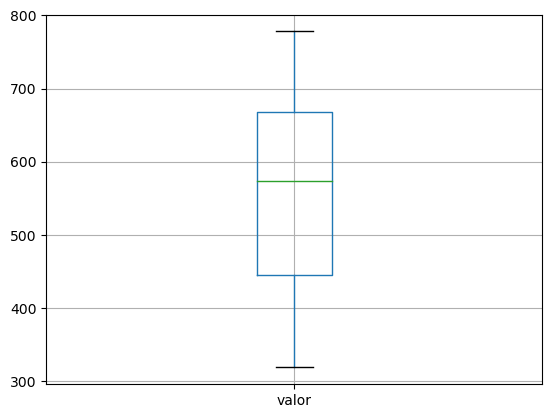

In [80]:
# Shows a boxplot with summary of the entire data
df_cwb.boxplot(column='valor')

<AxesSubplot:xlabel='Ano', ylabel='Número de Homicídios'>

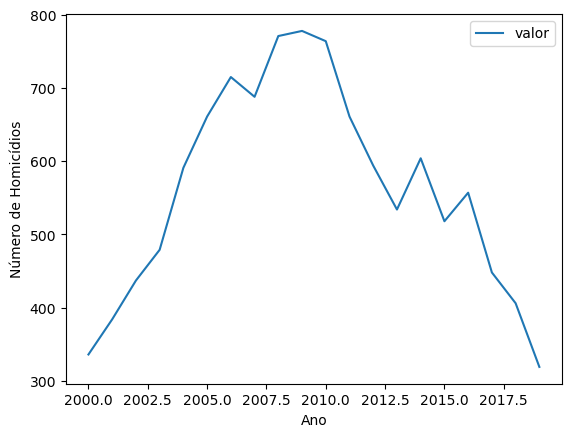

In [81]:
# Plot a time series of number of homicides per year
df_plot = df_cwb.plot(x='período', y='valor', kind='line')
df_plot.set_xlabel('Ano')
df_plot.set_ylabel('Número de Homicídios')
df_plot

<AxesSubplot:xlabel='Ano', ylabel='Número de Homicídios'>

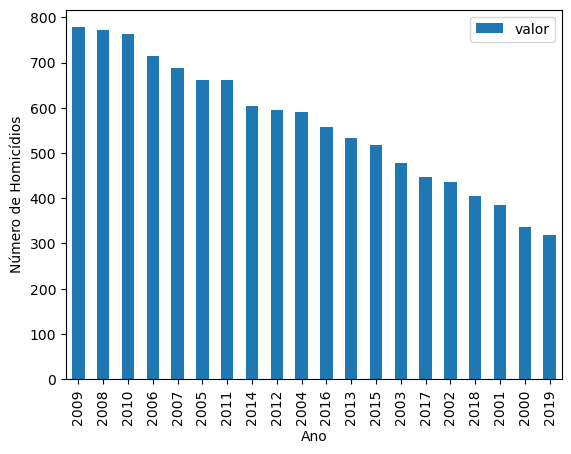

In [82]:
# Sorts the dataframe by column "valor"
# Plots a bar chart showing the years ranked by column "valor"
df_sorted = df_cwb.sort_values(by='valor', ascending=False)
df_plot = df_sorted.plot.bar(x='período', y='valor', rot=90)
df_plot.set_xlabel('Ano')
df_plot.set_ylabel('Número de Homicídios')
df_plot